https://www.youtube.com/watch?v=woKYyhLCcnU

### DB setup

In [1]:
import pandas as pd
import sqlite3
import sqlalchemy as db
from sqlalchemy.orm import Session
import matplotlib as plt
from collections import Counter
import operator
import matplotlib.pyplot as plt

In [ ]:
engine = db.create_engine('sqlite:///flights.sqlite3', echo=True)     #relative directory (in same folder as this notebook so no directory)
connection = engine.connect()
flights = db.Table('ontime', db.MetaData(), autoload=True, autoload_with=engine)
session = Session(bind=engine)
cols = flights.columns

In [3]:
cols.keys()

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

### Best and Worst Airlines

In [4]:
def percentages(timeDelay):
    numerator = Counter(session.query(cols.UniqueCarrier).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay).all())
    denominator = Counter(session.query(cols.UniqueCarrier).all())
    percentDict = {}
    for airline in denominator.keys():
        percentDict[str(airline)[2:4]] = (numerator[airline]/denominator[airline])*100
    return dict(sorted(percentDict.items(), key=operator.itemgetter(1), reverse=True))

In [5]:
onehour = percentages(60)

2019-12-01 22:00:45,413 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2019-12-01 22:00:45,418 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ?
2019-12-01 22:00:45,420 INFO sqlalchemy.engine.base.Engine (60,)
2019-12-01 22:01:42,921 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime
2019-12-01 22:01:42,922 INFO sqlalchemy.engine.base.Engine ()


In [6]:
threehours = percentages(180)

2019-12-01 22:15:49,283 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ?
2019-12-01 22:15:49,287 INFO sqlalchemy.engine.base.Engine (180,)
2019-12-01 22:16:16,784 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime
2019-12-01 22:16:16,785 INFO sqlalchemy.engine.base.Engine ()


In [7]:
fivehours = percentages(300)

2019-12-01 22:27:33,883 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ?
2019-12-01 22:27:33,885 INFO sqlalchemy.engine.base.Engine (300,)
2019-12-01 22:27:56,528 INFO sqlalchemy.engine.base.Engine SELECT ontime."UniqueCarrier" AS "ontime_UniqueCarrier" 
FROM ontime
2019-12-01 22:27:56,529 INFO sqlalchemy.engine.base.Engine ()


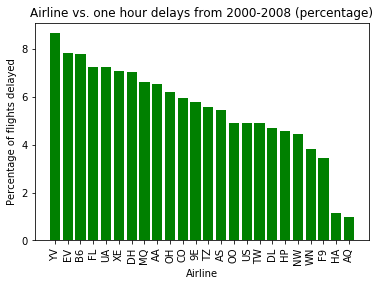

In [8]:
plt.bar(onehour.keys(), onehour.values(), width=0.8, color='g')
plt.xticks(range(len(onehour)), onehour.keys(), rotation=90)
plt.title("Airline vs. one hour delays from 2000-2008 (percentage)")
plt.xlabel("Airline")
plt.ylabel("Percentage of flights delayed")
plt.legend
plt.show()

In [12]:
print("YV = Mesa Airlines Inc.")
print("EV = Atlantic Southeast Airlines")
print("B6 = JetBlue Airways")
print("FL = AirTran Airways Corporation")
print("UA = United Air Lines Inc.")
print("XE = Expressjet Airlines Inc.")
print("DH = Independence Air")
print("MQ = American Eagle Airlines Inc.")
print("AA = American Airlines Inc.")
print("OH = Comair Inc")
print("CO = Continental Air Lines Inc.")
print("9E = Pinnacle Airlines Inc")
print("TZ = ATA Airlines")
print("AS = Alaska Airlines Inc.")
print("OO = Skywest Airlines Inc.")
print("US = US Airways Inc.")
print("TW = Trans World Airways LLC")
print("DL = Delta Air Lines Inc.")
print("HP = America West Airlines Inc.")
print("NW = Northwest Airlines Inc.")
print("WN = Southwest Airlines Co.")
print("F9 = Frontier Airlines Inc.")
print("HA = Hawaiian Airlines Inc.")
print("AQ = Aloha Airlines Inc.")


YV = Mesa Airlines Inc.
EV = Atlantic Southeast Airlines
B6 = JetBlue Airways
FL = AirTran Airways Corporation
UA = United Air Lines Inc.
XE = Expressjet Airlines Inc.
DH = Independence Air
MQ = American Eagle Airlines Inc.
AA = American Airlines Inc.
OH = Comair Inc
CO = Continental Air Lines Inc.
9E = Pinnacle Airlines Inc
TZ = ATA Airlines
AS = Alaska Airlines Inc.
OO = Skywest Airlines Inc.
US = US Airways Inc.
TW = Trans World Airways LLC
DL = Delta Air Lines Inc.
HP = America West Airlines Inc.
NW = Northwest Airlines Inc.
WN = Southwest Airlines Co.
F9 = Frontier Airlines Inc.
HA = Hawaiian Airlines Inc.
AQ = Aloha Airlines Inc.


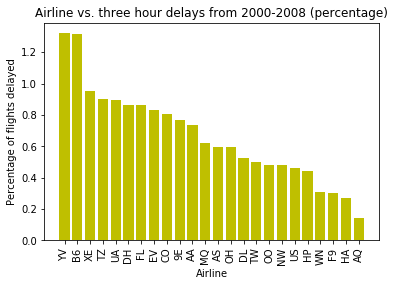

In [13]:
plt.bar(threehours.keys(), threehours.values(), width=0.8, color='y')
plt.xticks(range(len(threehours)), threehours.keys(), rotation=90)
plt.title("Airline vs. three hour delays from 2000-2008 (percentage)")
plt.xlabel("Airline")
plt.ylabel("Percentage of flights delayed")
plt.show()

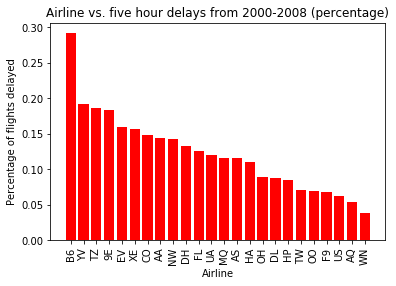

In [14]:
plt.bar(fivehours.keys(), fivehours.values(), width=0.8, color='r')
plt.xticks(range(len(fivehours)), fivehours.keys(), rotation=90)
plt.title("Airline vs. five hour delays from 2000-2008 (percentage)")
plt.xlabel("Airline")
plt.ylabel("Percentage of flights delayed")
plt.show()